# 交叉表和透视表

## 交叉表:pd.crosstab(value1, value2)
- 寻找两列数据之间的关系

In [5]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

data = pd.read_csv("./data/stock_day.csv")
# 删除一些列，让数据更简单些，再去做后面的操作
data = data.drop(["ma5","ma10","ma20","v_ma5","v_ma10","v_ma20"], axis=1)
data.tail()

,open,high,close,low,volume,price_change,p_change,turnover
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,6.16
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,3.19
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,2.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,4.76
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,3.30


- 分析股票涨幅和星期之间的关系
    - posi_neg是处理完的数据,大于 0 表示有一半以上在涨

In [4]:
#日期的基本操作
time = pd.to_datetime(data.index)
time.weekday
time.day

Int64Index([27, 26, 23, 22, 14, 13, 12,  9,  8,  7,
            ...
            13, 12, 11, 10,  9,  6,  5,  4,  3,  2],
           dtype='int64', length=643)

In [2]:
# 寻找星期几跟股票张得的关系
# 1、先把对应的日期找到星期几
date = pd.to_datetime(data.index).weekday
data['week'] = date

# 2、假如把p_change按照大小去分个类,0为界限,大于 0 表示涨,小于 0 表示跌
data['posi_neg'] = np.where(data['p_change'] > 0, 1, 0)

# 通过交叉表找寻两列数据的关系
count = pd.crosstab(data['week'], data['posi_neg'])
count

posi_neg,0,1
week,,
0,63,62
1,55,76
2,61,71
3,63,65
4,59,68


week
0    125.0
1    131.0
2    132.0
3    128.0
4    127.0
dtype: float32
---
posi_neg         0         1
week                        
0         0.504000  0.496000
1         0.419847  0.580153
2         0.462121  0.537879
3         0.492188  0.507812
4         0.464567  0.535433


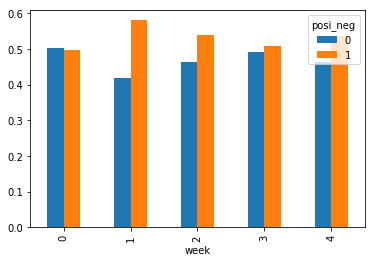

In [32]:
# 算数运算，先求和
sum = count.sum(axis=1).astype(np.float32)
print(sum)
print('---')
# 进行相除操作，得出比例
pro = count.div(sum, axis=0)
print(pro)
pro.plot(kind='bar', stacked=False)
plt.show()

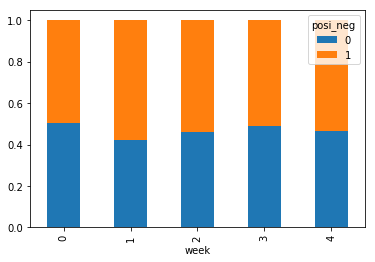

In [33]:
pro.plot(kind='bar', stacked=True)
plt.show()

In [34]:
# 通过透视表，将整个过程变成更简单一些
data.pivot_table(['posi_neg'], index='week')

,posi_neg
week,
0,0.496000
1,0.580153
2,0.537879
3,0.507812
4,0.535433
